In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [28]:
df=pd.read_csv('2110.csv')
df.Date = pd.to_datetime(df.Date)
df=df[df['Date']<='2022-01-1']
df.sort_values(by='Date', inplace=True)
print(df)
df['Month'] =df.Date.dt.month_name()
df['Year'] = df.Date.dt.year
df['Day']=df.Date.dt.day
df.set_index('Date', inplace=True)
print(df.head())

           Date    Open    High     Low   Close
0    2004-10-18  482.58  482.58  473.51  478.04
1    2004-10-19  476.23  480.76  474.41  475.32
2    2004-10-20  477.14  478.95  468.06  468.06
3    2004-10-21  468.06  471.69  462.62  468.06
4    2004-10-24  472.60  476.23  457.18  467.16
...         ...     ...     ...     ...     ...
3583 2021-12-26  115.29  115.83  112.48  112.48
3584 2021-12-27  112.26  112.37  109.67  111.29
3585 2021-12-28  111.83  112.37  110.75  111.29
3586 2021-12-29  111.83  111.83  107.08  107.94
3587 2021-12-30  108.81  109.13  105.35  105.46

[3588 rows x 5 columns]
              Open    High     Low   Close    Month  Year  Day
Date                                                          
2004-10-18  482.58  482.58  473.51  478.04  October  2004   18
2004-10-19  476.23  480.76  474.41  475.32  October  2004   19
2004-10-20  477.14  478.95  468.06  468.06  October  2004   20
2004-10-21  468.06  471.69  462.62  468.06  October  2004   21
2004-10-24  472.60  4

In [64]:
train,test=df.loc[:'1/1/2020','Close'],df.loc['1/1/2020':,'Close']

print(train)
print(test)




Date
2004-10-18    478.04
2004-10-19    475.32
2004-10-20    468.06
2004-10-21    468.06
2004-10-24    467.16
               ...  
2019-12-26     91.26
2019-12-29     95.23
2019-12-30     92.59
2019-12-31    100.26
2020-01-01    110.21
Name: Close, Length: 3089, dtype: float64
Date
2020-01-01    110.21
2020-01-02    121.23
2020-01-05    128.04
2020-01-06    115.29
2020-01-07    115.61
               ...  
2021-12-26    112.48
2021-12-27    111.29
2021-12-28    111.29
2021-12-29    107.94
2021-12-30    105.46
Name: Close, Length: 500, dtype: float64


c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


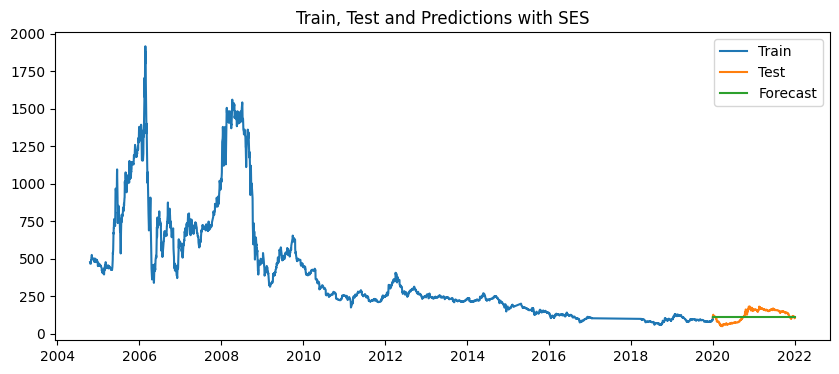

c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


3089    110.160059
3090    110.160059
3091    110.160059
3092    110.160059
3093    110.160059
           ...    
3184    110.160059
3185    110.160059
3186    110.160059
3187    110.160059
3188    110.160059
Length: 100, dtype: float64
DatetimeIndex(['2021-12-31', '2022-01-03', '2022-01-04', '2022-01-05',
               '2022-01-06', '2022-01-07', '2022-01-10', '2022-01-11',
               '2022-01-12', '2022-01-13', '2022-01-14', '2022-01-17',
               '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21',
               '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27',
               '2022-01-28', '2022-01-31', '2022-02-01', '2022-02-02',
               '2022-02-03', '2022-02-04', '2022-02-07', '2022-02-08',
               '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-14',
               '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18',
               '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24',
               '2022-02-25', '2022-02-28', '2022-03-0

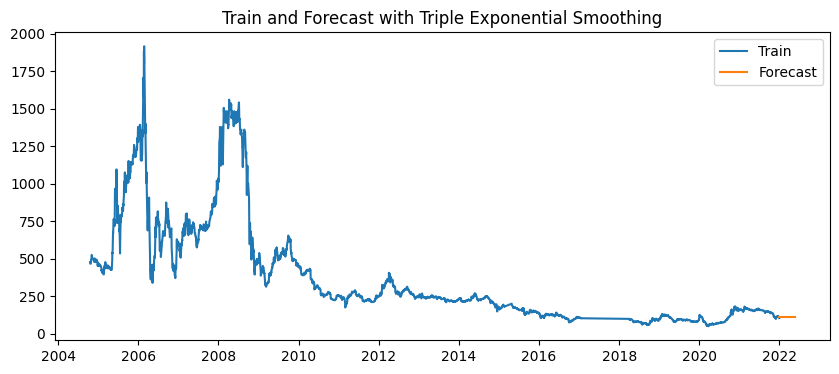

In [81]:
# SES (ONLY LVL)
model_simple = SimpleExpSmoothing(train).fit()
raw_forecast = model_simple.forecast(len(test))          
raw_forecast.index=test.index
plt.figure(figsize=(10, 4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(raw_forecast, label='Forecast')
plt.title("Train, Test and Predictions with SES")
plt.legend()
plt.show()


forecast = model_simple.forecast(100)
print(forecast)
future_index = pd.date_range(
    start = test.index[-1] + pd.tseries.frequencies.to_offset('B'), 
    periods = 100, 
    freq = 'B'
)

print(future_index)
forecast = pd.Series(forecast.values, index=future_index, name='Forecast')

print(forecast)
plt.figure(figsize = (10,4))

plt.plot(df.Close, label = 'Train')
plt.plot(forecast, label = "Forecast")

# Add title and legend to the plot
plt.title("Train and Forecast with Triple Exponential Smoothing")
plt.legend()
plt.show()


In [82]:
from math import sqrt


# Calculating the MAE, RMSE, and MAPE
# between the test values and our prediction values
mae = mean_absolute_error(test, raw_forecast)
rmse = sqrt(mean_squared_error(test, raw_forecast))
mape = mean_absolute_percentage_error(test, raw_forecast)

print(f"The MAE is {mae:.2f}")
print(f"The RMSE is {rmse:.2f}")
print(f"The MAPE is {100 * mape:.2f} %")

The MAE is 37.53
The RMSE is 41.55
The MAPE is 33.42 %


c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


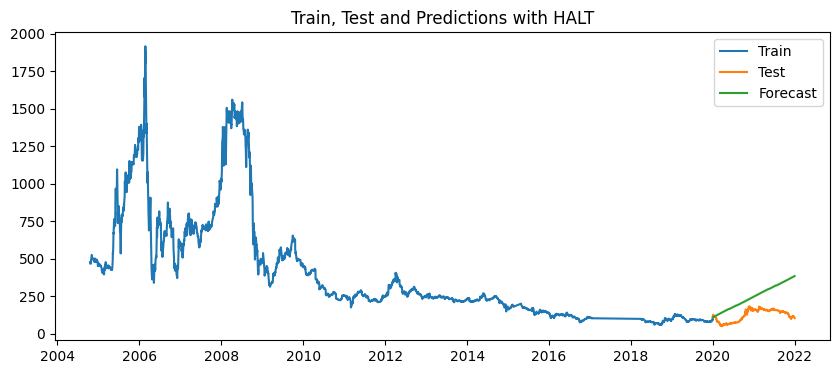

c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


3089    110.712560
3090    111.263443
3091    111.814326
3092    112.365208
3093    112.916091
           ...    
3184    163.046415
3185    163.597298
3186    164.148180
3187    164.699063
3188    165.249946
Length: 100, dtype: float64
DatetimeIndex(['2021-12-31', '2022-01-03', '2022-01-04', '2022-01-05',
               '2022-01-06', '2022-01-07', '2022-01-10', '2022-01-11',
               '2022-01-12', '2022-01-13', '2022-01-14', '2022-01-17',
               '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21',
               '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27',
               '2022-01-28', '2022-01-31', '2022-02-01', '2022-02-02',
               '2022-02-03', '2022-02-04', '2022-02-07', '2022-02-08',
               '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-14',
               '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18',
               '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24',
               '2022-02-25', '2022-02-28', '2022-03-0

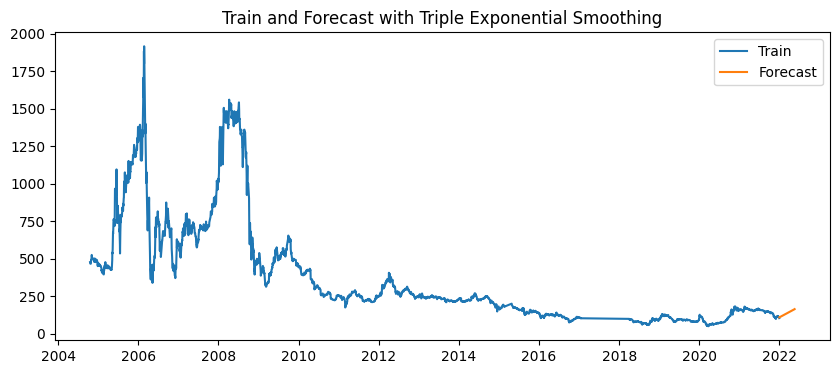

In [84]:
# halt (trnd only)
model_double = ExponentialSmoothing(train,
                                    trend = 'add',
                                    seasonal = None).fit()
raw_forecast = model_double.forecast(len(test))          
raw_forecast.index=test.index
plt.figure(figsize=(10, 4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(raw_forecast, label='Forecast')
plt.title("Train, Test and Predictions with HALT")
plt.legend()
plt.show()


forecast = model_double.forecast(100)
print(forecast)
future_index = pd.date_range(
    start = test.index[-1] + pd.tseries.frequencies.to_offset('B'), 
    periods = 100, 
    freq = 'B'
)

print(future_index)
forecast = pd.Series(forecast.values, index=future_index, name='Forecast')

print(forecast)
plt.figure(figsize = (10,4))

plt.plot(df.Close, label = 'Train')
plt.plot(forecast, label = "Forecast")

# Add title and legend to the plot
plt.title("Train and Forecast with Triple Exponential Smoothing")
plt.legend()
plt.show()


In [85]:
from math import sqrt


# Calculating the MAE, RMSE, and MAPE
# between the test values and our prediction values
mae = mean_absolute_error(test, raw_forecast)
rmse = sqrt(mean_squared_error(test, raw_forecast))
mape = mean_absolute_percentage_error(test, raw_forecast)

print(f"The MAE is {mae:.2f}")
print(f"The RMSE is {rmse:.2f}")
print(f"The MAPE is {100 * mape:.2f} %")

The MAE is 123.86
The RMSE is 138.77
The MAPE is 107.52 %


c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_

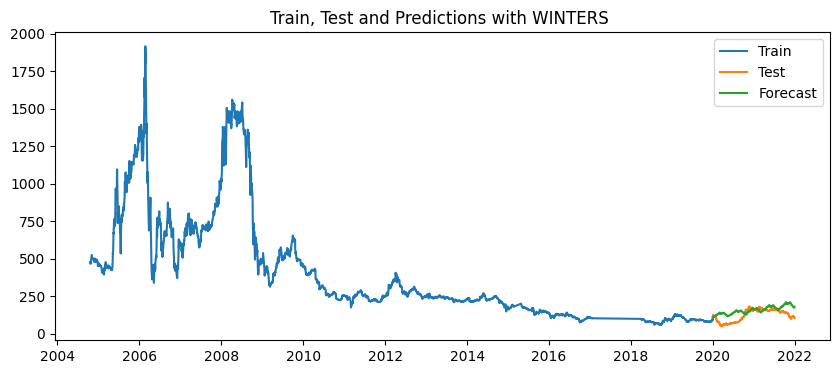

c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


3089    110.068328
3090    109.959504
3091    112.213957
3092    113.429516
3093    113.863074
           ...    
3184    118.855532
3185    119.927889
3186    119.790488
3187    120.863625
3188    121.267004
Length: 100, dtype: float64
DatetimeIndex(['2021-12-31', '2022-01-03', '2022-01-04', '2022-01-05',
               '2022-01-06', '2022-01-07', '2022-01-10', '2022-01-11',
               '2022-01-12', '2022-01-13', '2022-01-14', '2022-01-17',
               '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21',
               '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27',
               '2022-01-28', '2022-01-31', '2022-02-01', '2022-02-02',
               '2022-02-03', '2022-02-04', '2022-02-07', '2022-02-08',
               '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-14',
               '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18',
               '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24',
               '2022-02-25', '2022-02-28', '2022-03-0

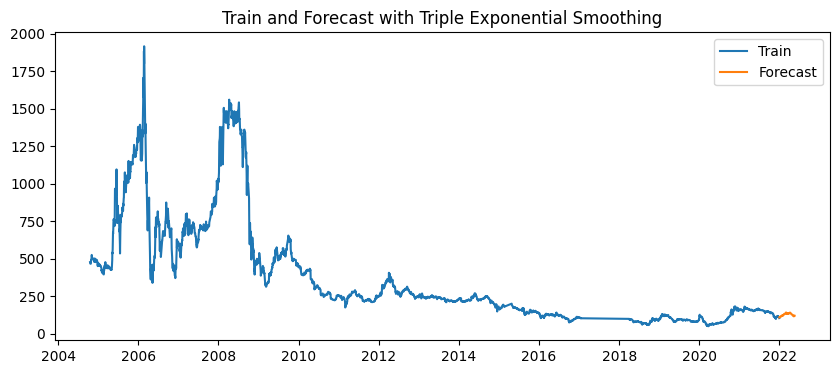

In [86]:
# WINTERS (trnd AND SEASONALITY)
model_triple = ExponentialSmoothing(train,
                                    trend = 'mul',
                                    seasonal = "mul",
                                    seasonal_periods = 100).fit()
raw_forecast = model_triple.forecast(len(test))          
raw_forecast.index=test.index
plt.figure(figsize=(10, 4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(raw_forecast, label='Forecast')
plt.title("Train, Test and Predictions with WINTERS ")
plt.legend()
plt.show()

forecast = model_triple.forecast(100)
print(forecast)
future_index = pd.date_range(
    start = test.index[-1] + pd.tseries.frequencies.to_offset('B'), 
    periods = 100, 
    freq = 'B'
)

print(future_index)
forecast = pd.Series(forecast.values, index=future_index, name='Forecast')

print(forecast)
plt.figure(figsize = (10,4))

plt.plot(df.Close, label = 'Train')
plt.plot(forecast, label = "Forecast")

# Add title and legend to the plot
plt.title("Train and Forecast with Triple Exponential Smoothing")
plt.legend()
plt.show()

In [87]:
from math import sqrt


# Calculating the MAE, RMSE, and MAPE
# between the test values and our prediction values
mae = mean_absolute_error(test, raw_forecast)
rmse = sqrt(mean_squared_error(test, raw_forecast))
mape = mean_absolute_percentage_error(test, raw_forecast)

print(f"The MAE is {mae:.2f}")
print(f"The RMSE is {rmse:.2f}")
print(f"The MAPE is {100 * mape:.2f} %")

The MAE is 39.16
The RMSE is 47.97
The MAPE is 42.82 %
